# Random blocks



Square blocks are dropped into a grid, similar to the game “Connect 4”:
after choosing a column, a block
falls vertically.

The blocks stops :
- on the bottom of the grid
- on another block already on the grid
- next to another block already on the grid.

so it stops as soon as one of the folowing conditions is satisfied:
- there is a block directly below it
- there is a block on the left or right
- it reaches the bottom of the grid.

So major difference with the game “Connect 4”, 
is that our blocks are “sticky”, 
i.e. a block stays stuck as soon as it meets a neighbor on the left or the right.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.zeros((10,10), dtype=np.int8)
print(X)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [3]:
X[0,5] = 1
X[-1,:] = 1
print(X)

[[0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]]


In [40]:
def to_chk(x):
    if 1 < x < 10: 
        rr = [x - 1 , x, x + 1]
    if x == 0: 
        rr = [0, 1]
    if x == 10: 
        rr = [9,10]
    rr.extend([x + 10 for x in rr])
    return rr
    
    

In [4]:

def find_stop(x, grid): 
    #make a copy of the 3 cols
    U = np.copy( grid[:, x-1: x+2])
    # don't need to do this but easier to think this way
    U = U.T
    # the middle col moves up 1 
    U[1] = np.roll(U[1], -1)   
    xs, ys = np.where(U > 0)
    return min(ys)

def grid2im(grid):
    return np.stack((1 - grid.astype(np.float).T,)*3).T


def mk_shape(size=30,
             num_blocks=30*30//3,
             anim=False):

    grid = np.zeros((size, size), dtype=np.int8)
    grid[-1:] = 1 # last line is all 1
    
    frames = []
    for k in range(num_blocks):
        x = np.random.randint(1, high=size-1)  
        grid[ find_stop(x, grid), x] = 1
        if anim : frames.append(grid2im(grid))
    
    if anim: return frames
    return grid
    

print(mk_shape())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0]
 [0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0]
 [0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0]
 [0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1

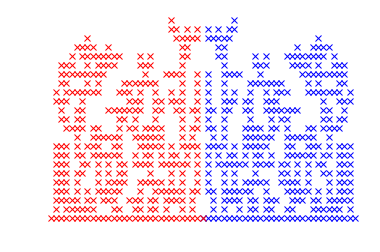

In [20]:
X, Y  = np.where( mk_shape() > 0)
plt.axis('off')
plt.plot(Y, -X,'bx')
plt.plot(-Y, -X,'rx') # symmetric copy (rorschach)

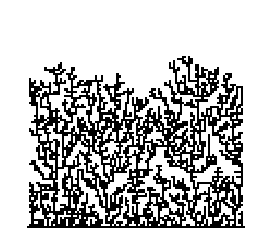

In [12]:
#r,g,b layers are all the same

N = 100
grid = mk_shape(size=N, num_blocks=N**2//3)

image = np.stack((1 - grid.astype(np.float).T,)*3).T

plt.axis('off')
plt.imshow(image)


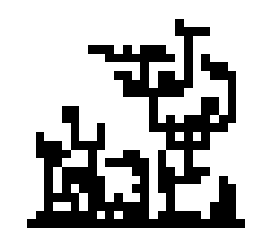

In [11]:
import  matplotlib.animation
from matplotlib import animation

from IPython.display import HTML
%matplotlib inline

def plot_images(img_list):
  def init():
    img.set_data(img_list[0])
    return (img,)

  def animate(i):
    img.set_data(img_list[i])
    return (img,)

  fig = plt.figure()
  ax = fig.gca()
  plt.axis('off')
  img = ax.imshow(img_list[0])
  anim = animation.FuncAnimation(fig, animate, 
                                 init_func=init,
                                 frames=len(img_list), 
                                 interval=60, 
                                 blit=True)
  return anim

imgs = mk_shape(size=25, num_blocks=200, anim=True)

HTML(plot_images(imgs).to_html5_video())